In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [41]:
iris_data = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

In [42]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [44]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [47]:
iris_data.duplicated().sum()

np.int64(0)

In [48]:
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Id                  Axes(0.125,0.11;0.133621x0.77)
SepalLengthCm    Axes(0.285345,0.11;0.133621x0.77)
SepalWidthCm      Axes(0.44569,0.11;0.133621x0.77)
PetalLengthCm    Axes(0.606034,0.11;0.133621x0.77)
PetalWidthCm     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

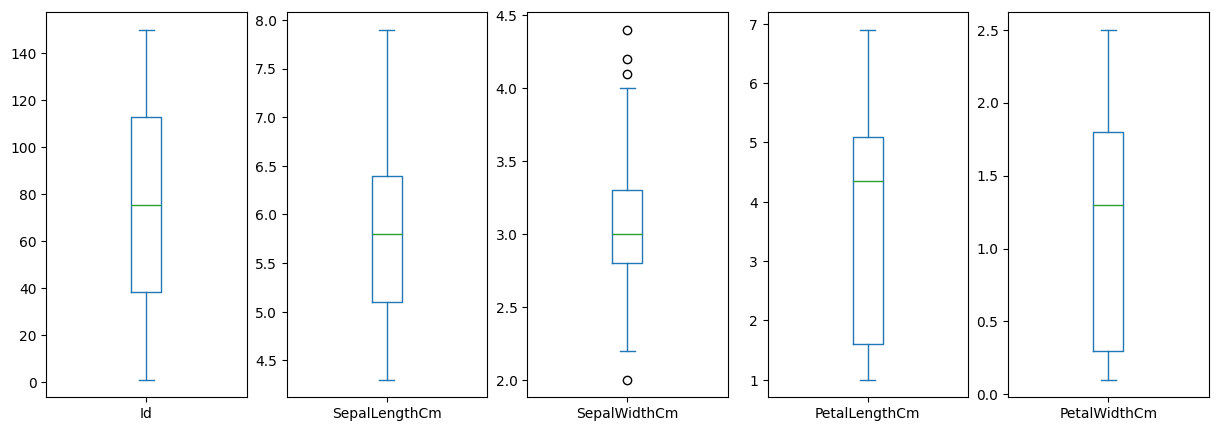

In [49]:
import pandas as pd

# Load the dataset from CSV
iris_data = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

# Plot the boxplots
iris_data.plot(kind='box', subplots=True, sharey=False, figsize=(15, 5))

In [50]:
# Calculate IQR
IQR = iris_data['SepalWidthCm'].quantile(0.75) - iris_data['SepalWidthCm'].quantile(0.25)

# Get Q1 and Q3
Q1 = iris_data['SepalWidthCm'].quantile(0.25)
Q3 = iris_data['SepalWidthCm'].quantile(0.75)

# Calculate lower and upper limits
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)

print("IQR:", IQR)
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

IQR: 0.5
Lower Limit: 2.05
Upper Limit: 4.05


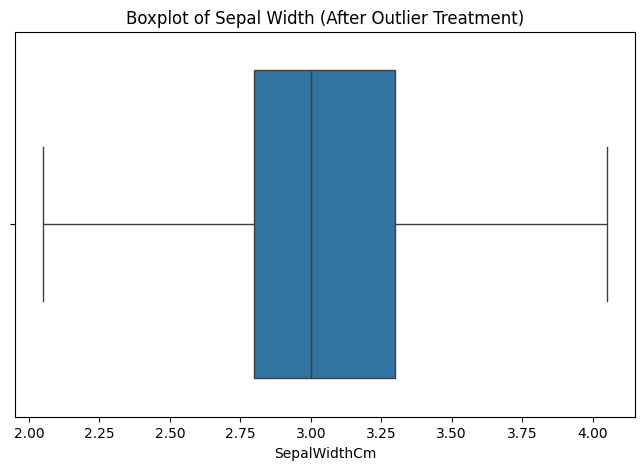

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Capping outliers using IQR limits
iris_data['SepalWidthCm'] = np.where(iris_data['SepalWidthCm'] > upper_limit, upper_limit, 
                                     np.where(iris_data['SepalWidthCm'] < lower_limit, lower_limit, 
                                              iris_data['SepalWidthCm']))

# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=iris_data['SepalWidthCm'])
plt.title('Boxplot of Sepal Width (After Outlier Treatment)')
plt.show()

Id                  Axes(0.125,0.11;0.133621x0.77)
SepalLengthCm    Axes(0.285345,0.11;0.133621x0.77)
SepalWidthCm      Axes(0.44569,0.11;0.133621x0.77)
PetalLengthCm    Axes(0.606034,0.11;0.133621x0.77)
PetalWidthCm     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

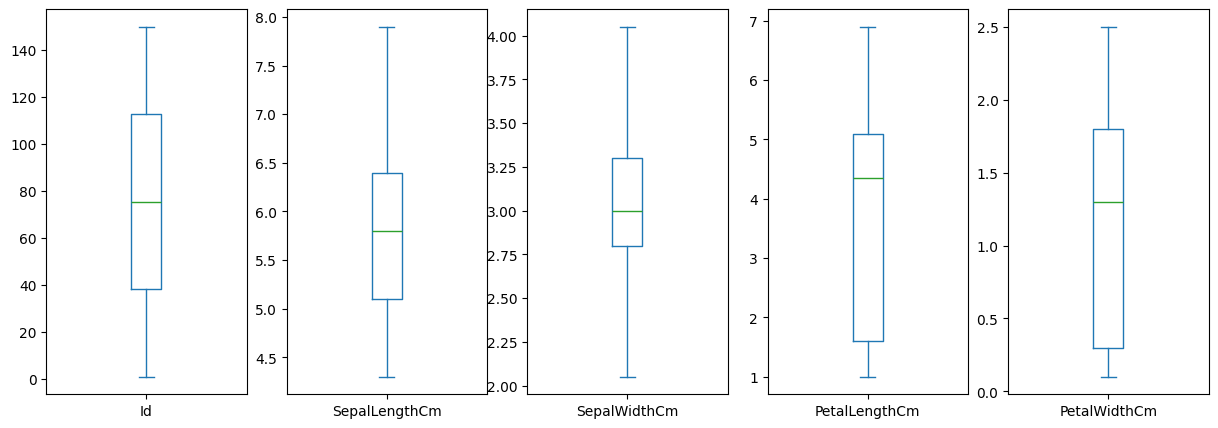

In [52]:
iris_data.plot(kind='box', subplots=True, sharey=False, figsize=(15, 5))

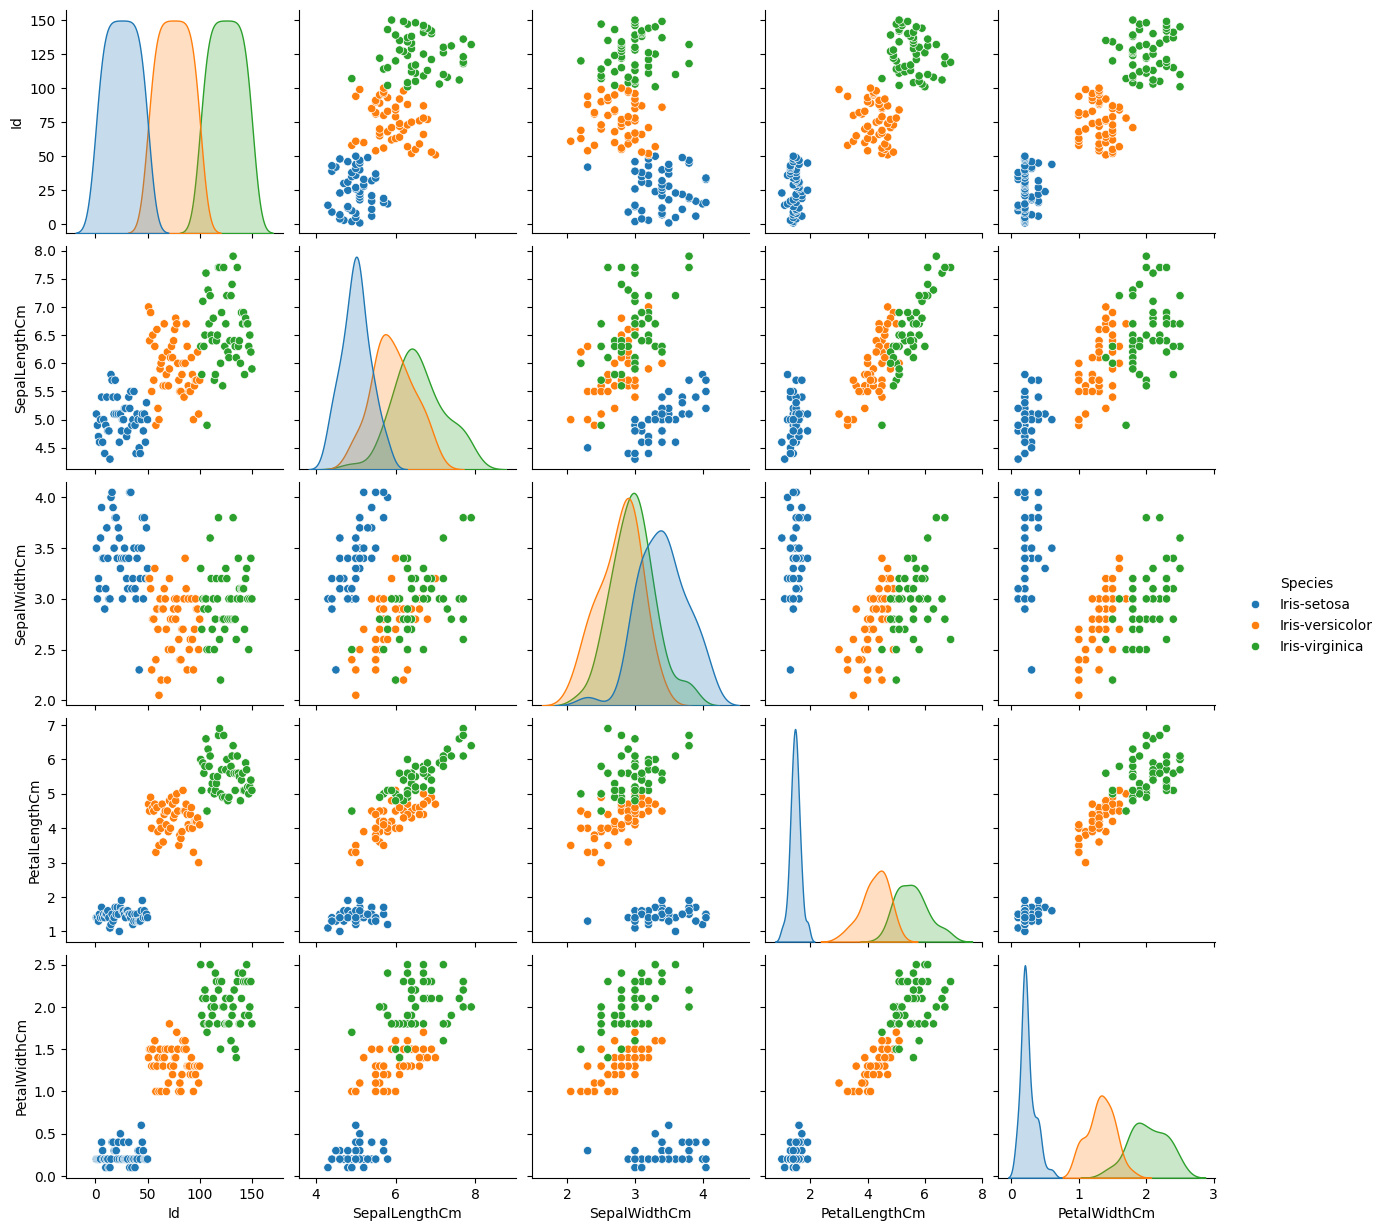

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot without 'marker' argument
sns.pairplot(iris_data, hue="Species")

plt.show()

In [54]:
numeric_iris = iris_data.drop("Species", axis=1)
numeric_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


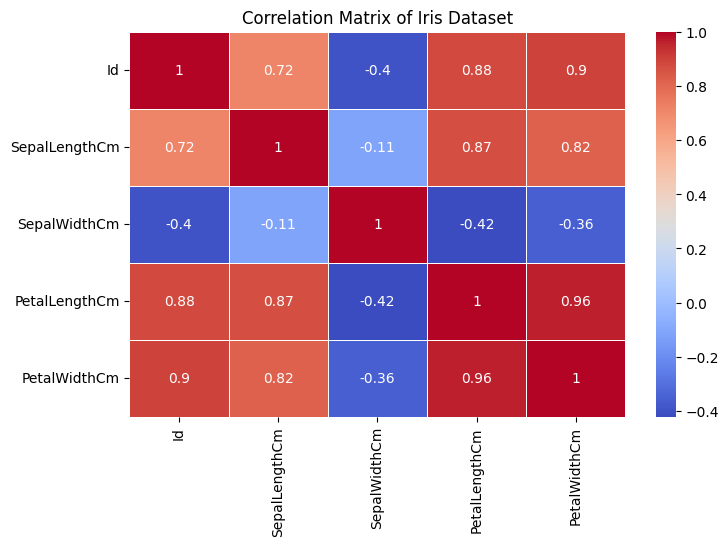

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like 'Species' or 'Id')
numeric_data = iris_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix of Iris Dataset")
plt.show()

In [56]:
species_counts = iris_data["Species"].value_counts()
print(species_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


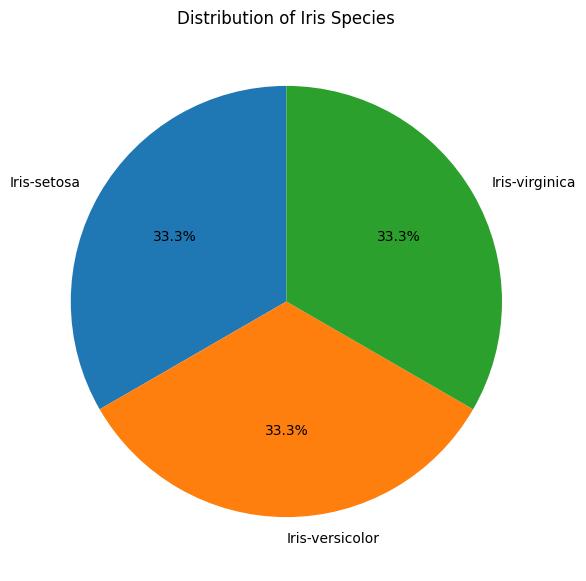

In [57]:
import matplotlib.pyplot as plt

# Count occurrences of each species
species_counts = iris_data["Species"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)

# Title
plt.title("Distribution of Iris Species")
plt.show()

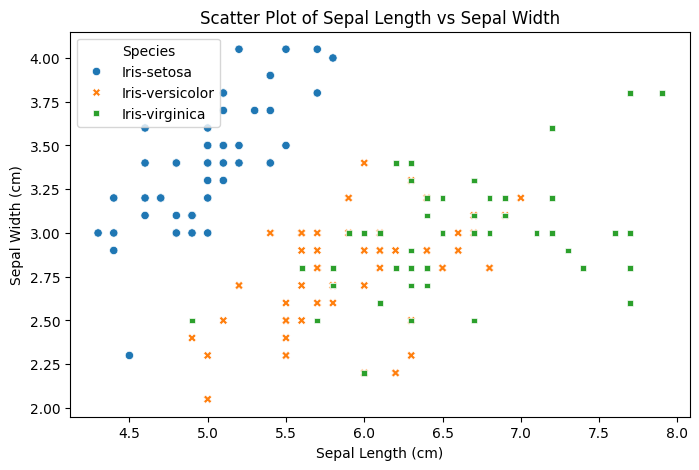

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris_data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", style="Species")

# Add labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")

# Show plot
plt.show()

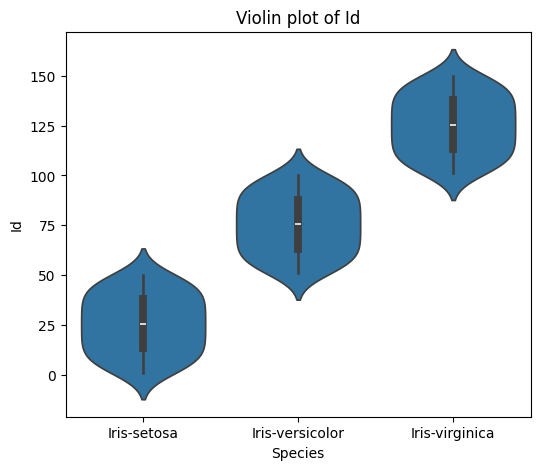

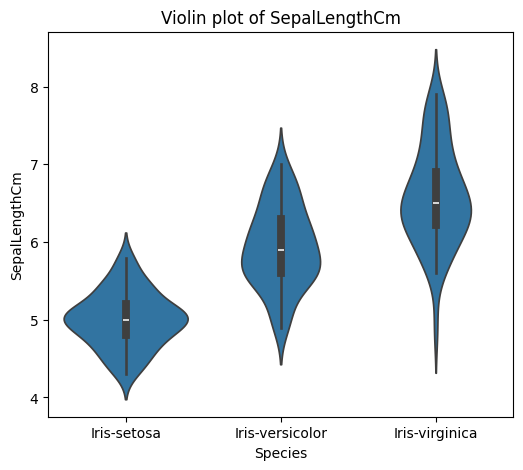

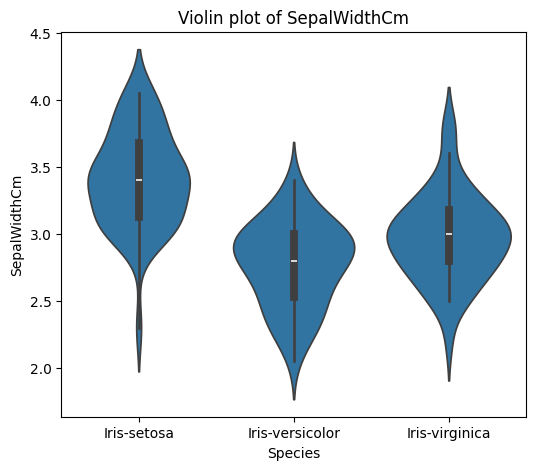

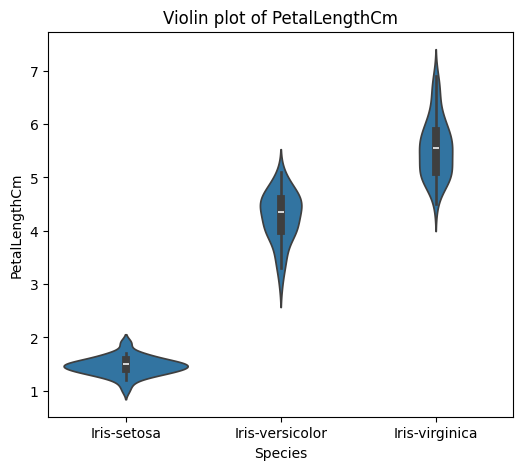

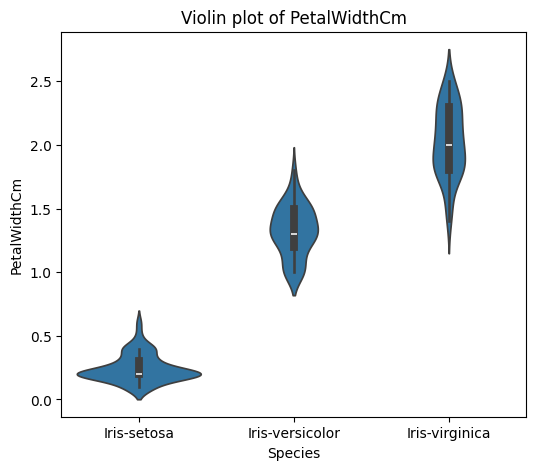

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns (excluding the 'Species' column)
numeric_columns = iris_data.columns[:-1]

for col in numeric_columns:
    plt.figure(figsize=(6, 5))
    sns.violinplot(x="Species", y=col, data=iris_data)
    plt.title(f"Violin plot of {col}")
    plt.xlabel("Species")
    plt.ylabel(col)
    plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data["Species"]= le.fit_transform(iris_data["Species"])
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [61]:
iris_data["Species"].unique()

array([0, 1, 2])

In [62]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [63]:
x = iris_data.iloc[:, [0, 1, 2, 3]]  # Selecting first 4 columns
print(x.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0   1            5.1           3.5            1.4
1   2            4.9           3.0            1.4
2   3            4.7           3.2            1.3
3   4            4.6           3.1            1.5
4   5            5.0           3.6            1.4


In [64]:
y = iris_data.iloc[:, -1]  # Assign the last column to 'y'
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
137,138,6.4,3.1,5.5
84,85,5.4,3.0,4.5
27,28,5.2,3.5,1.5
127,128,6.1,3.0,4.9
132,133,6.4,2.8,5.6
...,...,...,...,...
9,10,4.9,3.1,1.5
103,104,6.3,2.9,5.6
67,68,5.8,2.7,4.1
117,118,7.7,3.8,6.7


In [67]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
114,115,5.8,2.80,5.1
62,63,6.0,2.20,4.0
33,34,5.5,4.05,1.4
107,108,7.3,2.90,6.3
7,8,5.0,3.40,1.5
100,101,6.3,3.30,6.0
40,41,5.0,3.50,1.3
86,87,6.7,3.10,4.7
76,77,6.8,2.80,4.8
71,72,6.1,2.80,4.0


In [68]:
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int64

In [69]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: Species, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [71]:
print(x.head()); print(y.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0   1            5.1           3.5            1.4
1   2            4.9           3.0            1.4
2   3            4.7           3.2            1.3
3   4            4.6           3.1            1.5
4   5            5.0           3.6            1.4
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [72]:
if isinstance(x_train, pd.Series):
    x_train = x_train.to_frame()

if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()

lmodel = LogisticRegression(max_iter=1000, random_state=42)
lmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
if isinstance(x_test, pd.Series):
    x_test = x_test.to_frame()

y_pred = lmodel.predict(x_test) 

In [74]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:" , accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
 # Randome Forest Classification #

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
y = iris_data.iloc[:,-1]
x = iris_data.iloc[:,[0,1,2,3]]

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
rmodel = RandomForestClassifier(n_estimators=1000, random_state=42)
rmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [79]:
y_pred = rmodel.predict(x_test)

In [80]:
  # DECISION TREE #

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:" , accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [82]:
  #Support Vector Machine 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Convert 'Species' to numerical labels
df['Species'] = df['Species'].astype('category').cat.codes

# Split data into features (X) and target (y)
X = df.drop(columns=['Species'])  # Features (Sepal & Petal measurements)
y = df['Species']  # Target (Species label)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smodel = SVC(kernel='linear', C=1, random_state=42) 
smodel.fit(X_train, y_train)  # Train model

# Make predictions
y_pred = smodel.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [84]:
 #(KNN Classification)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Convert 'Species' to numerical labels
df['Species'] = df['Species'].astype('category').cat.codes

# Split data into features and target
X = df.drop(columns=['Species'])  # Features (sepal & petal measurements)
y = df['Species']  # Target (Species label)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature values (optional but improves accuracy for distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
k = 5  # Choose the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [85]:
  #NAIVE BAYES CLASSIFICATION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Convert 'Species' to numerical labels
df['Species'] = df['Species'].astype('category').cat.codes

# Split data into features (X) and target (y)
X = df.drop(columns=['Species'])  # Features (sepal & petal measurements)
y = df['Species']  # Target (Species label)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print results
print("✅ Naïve Bayes Classification Results:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

✅ Naïve Bayes Classification Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('C:/Users/qshoe/OneDrive/Documents/Iris.csv')

# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Convert 'Species' to numerical labels
df['Species'] = df['Species'].astype('category').cat.codes

# Split data into features (X) and target (y)
X = df.drop(columns=['Species'])  # Features (sepal & petal measurements)
y = df['Species']  # Target (Species label)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
dmodel = DecisionTreeClassifier().fit(X_train, y_train)
nmodel = GaussianNB().fit(X_train, y_train)
kmodel = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
smodel = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
rmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
lmodel = LogisticRegression(max_iter=200).fit(X_train, y_train)

# Single input data point
input_data = (2.9, 3.1, 4.1, 5.2)

try:
    # Convert input to DataFrame with correct column names
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Apply StandardScaler transformation
    input_data_reshaped = scaler.transform(input_df)

    # Make predictions using trained models
    pred1 = dmodel.predict(input_data_reshaped)
    pred2 = nmodel.predict(input_data_reshaped)
    pred3 = kmodel.predict(input_data_reshaped)
    pred4 = smodel.predict(input_data_reshaped)
    pred5 = rmodel.predict(input_data_reshaped)
    pred6 = lmodel.predict(input_data_reshaped)

    # Print predictions from each model
    print("Decision Tree Prediction:", pred1[0])
    print("Naïve Bayes Prediction:", pred2[0])
    print("K-Nearest Neighbors Prediction:", pred3[0])
    print("Support Vector Machine Prediction:", pred4[0])
    print("Random Forest Prediction:", pred5[0])
    print("Logistic Regression Prediction:", pred6[0])

except NameError as e:
    print("❌ Error: One or more models are not defined. Please train all models before prediction.")
    print(str(e))
except Exception as e:
    print("❌ Unexpected error:", str(e))

Decision Tree Prediction: 2
Naïve Bayes Prediction: 2
K-Nearest Neighbors Prediction: 2
Support Vector Machine Prediction: 2
Random Forest Prediction: 2
Logistic Regression Prediction: 2
